# Predict Diabetes with Machine Learning

Link of Diabetes Prediction In Indian Females, Check project streamlit app

link:- https://share.streamlit.io/rashmdesh/predict-diabetes/main/diabetes_app.py 

Github link:-https://github.com/RashmDesh/Predict-Diabetes

# ABOUT DATASET
* In this dataset, the outcome used as the target class to predict that the  Indians female is diabetic or not( 0=no diabetic and 1= diabetic)based on information about the patient such as blood pressure, body mass index (BMI), age,pregnancies etc. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [266]:
diabetes_data=pd.read_csv('C:/Users/lenovo/Desktop/datasets/Diabetes/diabetes.csv')
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print("Number of Rows and columns is datasets are :",diabetes_data.shape)

Number of Rows and columns is datasets are : (768, 9)


In [8]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Observation:
1. In diabetes datasets we have 768 rows and 9 columns.
2. Columns Details:-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'.
3. There is non null values in datasets.
4. There are  9 numberical columns with 6 int64 types and 2 are folat type.

- - - 

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


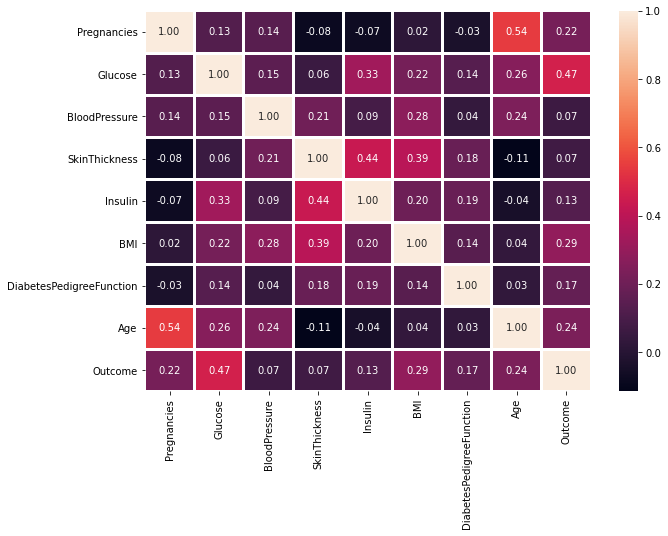

In [15]:
plt.figure(figsize = (10,7,))
corrMatrix=diabetes_data.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype = bool))
sns.heatmap(corrMatrix,annot=True, fmt = '.2f', linewidths = 2)
plt.show()

# Observation:
1. There are postives correlation between outcomes with other columns('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age')
2. There are Strong Positive Correlation between Pregnancies and Age.

- - - 

# Diabetes Dataset Analysis

In [19]:
#number of diabetes count 0=no diabetes 1=diabetes
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

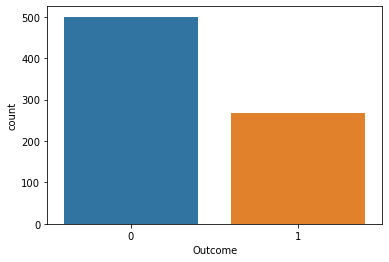

In [20]:
#Graphical representation of number of diabetes count 0=no diabetes 1=diabetes
sns.countplot(diabetes_data["Outcome"])

In [71]:
# non diabetes paitient details
diabetes_data[diabetes_data["Outcome"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [74]:
# non diabetes paitient details
diabetes_data[diabetes_data["Outcome"]==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

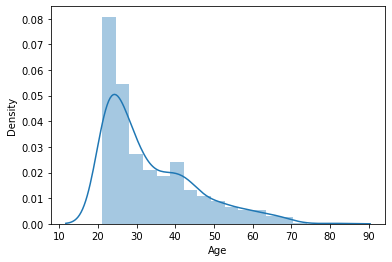

In [22]:
#Age destribution
sns.distplot(diabetes_data['Age'])

In [23]:
#number of pregnancies with count
diabetes_data["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

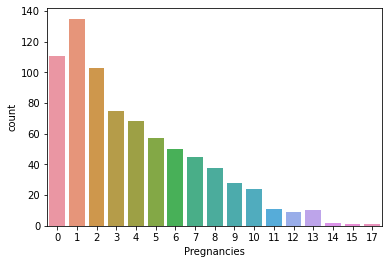

In [24]:
# Graphical Representation of number of pregnancies with count
sns.countplot(diabetes_data["Pregnancies"])

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

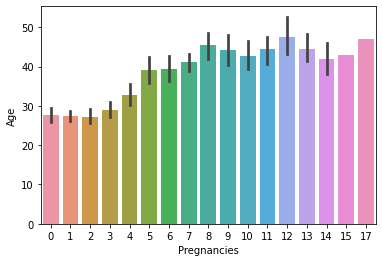

In [27]:
#Preganacies vs Age Graphical Represenatation
sns.barplot(x='Pregnancies', y='Age', data = diabetes_data)

- - -

# Time to Apply Machine Leraning Algorithum

Split the Data into Test and Training data

In [267]:
data=diabetes_data.drop(['Outcome','SkinThickness'],axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [268]:
data.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000


In [269]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(data,diabetes_data['Outcome'],test_size=0.20,random_state=10)

In [270]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
120,0,162,76,100,53.2,0.759,25
172,2,87,0,0,28.9,0.773,25
307,0,137,68,148,24.8,0.143,21
7,10,115,0,0,35.3,0.134,29
448,0,104,64,64,33.6,0.510,22


In [271]:
train_y.head()

120    1
172    0
307    0
7      0
448    1
Name: Outcome, dtype: int64

In [298]:
test_X[:10]

array([[ 0.04858483,  0.99884929,  0.14548285,  0.37060943, -0.06386026,
        -0.3818644 ,  0.32262081],
       [-0.54212969, -0.28681707,  0.85162098,  0.65429082,  0.84118667,
        -0.66362514, -0.44318786],
       [-0.83748694,  0.41723832, -0.76240902, -0.68068042, -0.6502287 ,
         0.68698881,  2.44986711],
       [-0.24677243, -0.43987259, -0.35890152, -0.28018905, -1.13462002,
         0.65942526, -0.86863712],
       [-0.24677243, -0.5929281 ,  0.24635973, -0.68068042, -0.29330878,
        -1.04645222, -0.10282845],
       [-0.83748694, -0.74598362, -0.15714777,  0.48741941, -1.0963786 ,
         0.07446548, -0.95372697],
       [-1.1328442 , -0.5317059 , -0.25802464,  0.28717373, -0.51001016,
        -0.02660087, -0.86863712],
       [ 0.9346566 , -0.22559486, -0.15714777, -0.68068042,  0.12734683,
        -0.62687374,  0.74807007],
       [ 0.04858483, -1.17453907,  0.85162098, -0.68068042, -0.31880306,
        -0.44617935,  0.06735125],
       [-1.1328442 ,  0.4784

# Using Different types of Machine Learning Model

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Fit the all ML Models

In [273]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [274]:
scoring='accuracy'

In [275]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [276]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

LogisticRegression()
Logistic Regression 0.771920
DecisionTreeClassifier()
Decision Tree 0.672634


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.773533


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RandomForestClassifier()
Random Forest 0.765415


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVC()
Support Vector Classifier 0.765574
KNeighborsClassifier()
K- Neirest Neighbour 0.737758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GaussianNB()
Naive Bayes 0.758911


# Observation:
* LogisticRegression() gives hige accuracy.
 Logistic Regression 0.760524

# Now we use LogisticRegression for Diabetes Prediction

* Logistic regression predicts the output of a categorical dependent variable. 

* Dependant variable:- quality (as it is categorize in 5,6,7,4,8,3)
    
* Independant Variable:- fixed acidity, volatile acidity, residual sugar,pH, alcohol

In [277]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable

In [278]:
st_x= StandardScaler()    
train_X= st_x.fit_transform(train_X)    
test_X= st_x.transform(test_X)  

* Fitting Logistic Regression to the Training set:

We have well prepared our dataset, and now we will train the dataset using the training set. For providing training or fitting the model to the training set, we will import the LogisticRegression class of the sklearn library.

In [279]:
LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",(accuracy_score(test_y,pred))*100,"%\n")
print("Confusion Matrix :\n",confusion_matrix(test_y,pred))
print("\nclassification report:\n",classification_report(test_y,pred))

Model Accuracy:-  76.62337662337663 %

Confusion Matrix :
 [[87  8]
 [28 31]]

classification report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        95
           1       0.79      0.53      0.63        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



In [280]:
print(pred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0]


In [281]:
test=data[2:]
test

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
5,5,116,74,0,25.6,0.201,30
6,3,78,50,88,31.0,0.248,26
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [282]:
test_pred=LR.predict(test)

In [283]:
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# Now our model is trained .Lets check predication of diabetes.

In [345]:
def diabetes_predict(test):
    if(test==1):
        print("You have Diabetes")
    else:
        print("You don't have Diabetes")

In [346]:
# TAken data from the logistic_data set for testing model
test_check =LR.predict([[3,78,50,88,31.0,0.248,26]])
print(test_check)
diabetes_predict(test_check)

[1]
You have Diabetes


In [347]:
test_check =LR.predict([[0,115,0,0,35.3,0.134,29]])
print(test_check)
diabetes_predict(test_check)

[1]
You have Diabetes


- - -

# Decision Tree Algorithum

In [348]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X,train_y)
pred_tree=decision_tree.predict(test_X)
print("Model Accuracy:- ",(accuracy_score(test_y,pred))*100,"%\n")
print("Confusion Matrix :\n",confusion_matrix(test_y,pred))
print("\nclassification report:\n",classification_report(test_y,pred))

Model Accuracy:-  76.62337662337663 %

Confusion Matrix :
 [[87  8]
 [28 31]]

classification report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        95
           1       0.79      0.53      0.63        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



In [349]:
print(pred_tree)

[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 0 0 0 0 0 0]


In [350]:
# testing model
test_check =decision_tree.predict([[0,0,0,0,31.0,0.248,26]])
print(test_check)
diabetes_predict(test_check)

[1]
You have Diabetes


In [351]:
# testing model
test_check =decision_tree.predict([[10,115,0,0,35.3,0.134,29]])
print(test_check)
diabetes_predict(test_check)

[0]
You don't have Diabetes


In [352]:
# testing model
test_check =decision_tree.predict([[0,0,0,0,0,0,0]])
print(test_check)
diabetes_predict(test_check)

[1]
You have Diabetes


# Creating pickle model for prediction

Note:- Am using this model in my web application which predict Diabetes.

Decision tree Model :- DT_Model.pkl. This is decision tree model which we are going to use for predic diabetes.

In [192]:
import pickle

In [193]:
# now you can save it to a file
file = 'C:/Users/lenovo/Desktop/datasets/Diabetes/DT_Model.pkl'
with open(file, 'wb') as f:
    pickle.dump(decision_tree, f)

In [194]:
with open(file, 'rb') as f:
    diabetes = pickle.load(f)

In [361]:
#test pickle DT_Model.pkl model
test_diabetes = diabetes.predict([[3,78,50,88,31.0,0.248,26]])
print(test_diabetes)
diabetes_predict(test_diabetes)

[1]
You have Diabetes


In [360]:
#test pickle DT_Model.pkl model
test_diabetes = diabetes.predict([[10,115,0,0,35.3,0,29]])
print(test_diabetes)
diabetes_predict(test_diabetes)

[0]
You don't have Diabetes


In [359]:
#test pickle DT_Model.pkl model
test_diabetes = diabetes.predict([[0,0,0,0,0,0,0]])
print(test_diabetes)
diabetes_predict(test_diabetes)

[1]
You have Diabetes


In [353]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)
pred_knn=knn.predict(test_X)
print("Model Accuracy:- ",(accuracy_score(test_y,pred))*100,"%\n")
print("Confusion Matrix :\n",confusion_matrix(test_y,pred))
print("\nclassification report:\n",classification_report(test_y,pred))

Model Accuracy:-  76.62337662337663 %

Confusion Matrix :
 [[87  8]
 [28 31]]

classification report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        95
           1       0.79      0.53      0.63        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



In [354]:
print(pred_knn)

[1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 0]


In [355]:
# testing model
test_knn =knn.predict([[0,0,0,0,31.0,0.248,26]])
print(test_knn)
diabetes_predict(test_knn)

[0]
You don't have Diabetes


In [356]:
# testing model
test_knn =knn.predict([[0,0,0,0,0,0,0]])
print(test_knn)
diabetes_predict(test_knn)

[0]
You don't have Diabetes


In [357]:
# testing model
test_knn =knn.predict([[3,78,50,88,31.0,0.248,26]])
print(test_knn)
diabetes_predict(test_knn)

[1]
You have Diabetes


# Creating pickle model for prediction

Note:- Am using this model in my web application which predict Diabetes.

Decision tree Model :- DT_Model.pkl. This is decision tree model which we are going to use for predic diabetes.

In [368]:
# now you can save it to a file
file = 'C:/Users/lenovo/Desktop/datasets/Diabetes/KNN_Model.pkl'
with open(file, 'wb') as f:
    pickle.dump(knn, f)

In [369]:
with open(file, 'rb') as f:
    diabetesknn = pickle.load(f)

In [370]:
#test pickle DT_Model.pkl model
test_diabetes = diabetesknn.predict([[3,78,50,88,31.0,0.248,26]])
print(test_diabetes)
diabetes_predict(test_diabetes)

[1]
You have Diabetes


In [371]:
#test pickle DT_Model.pkl model
test_diabetes = diabetesknn.predict([[0,0,0,0,31.0,0.248,26]])
print(test_diabetes)
diabetes_predict(test_diabetes)

[0]
You don't have Diabetes


In [372]:
#test pickle DT_Model.pkl model
test_diabetes = diabetesknn.predict([[0,0,0,0,0,0,0]])
print(test_diabetes)
diabetes_predict(test_diabetes)

[0]
You don't have Diabetes


Using KNN_Model.pkl for furtur prediction.